In [43]:
import warnings
warnings.filterwarnings('once')

In [44]:
import pandas as pd

In [45]:
imdata=pd.read_csv('/content/magic_gamma_telescope04_.csv')

In [46]:
imdata

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [47]:
imdata.isna().sum()

flength     0
fwidth      0
fsize       0
fconc       0
fconc1      0
fsym        0
fm3long     0
fm3trans    0
falpha      0
dist        0
class       0
dtype: int64

In [48]:
imdata.duplicated().sum()

115

In [49]:
import numpy as np
import matplotlib.pyplot as plt
imdata.dropna(inplace=True)
imdata=imdata.drop_duplicates()
imdata.columns

Index(['flength', 'fwidth', 'fsize', 'fconc', 'fconc1', 'fsym', 'fm3long',
       'fm3trans', 'falpha', 'dist', 'class'],
      dtype='object')

In [50]:
imdata.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000
mean,53.161416,22.145872,2.824643,0.380247,0.214560,-4.177867,10.618826,0.259364,27.551644,193.712554
std,42.259789,18.300664,0.472377,0.182709,0.110384,59.010059,50.900687,20.775268,26.083055,74.685712
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.359700,11.874200,2.477100,0.235800,0.128500,-20.479100,-12.769300,-10.835800,5.516400,142.269000
50%,37.129500,17.143800,2.740000,0.354000,0.196400,4.062900,15.338000,0.750000,17.533000,191.832000
75%,69.975400,24.712400,3.101100,0.503500,0.285000,24.133500,35.869400,10.948900,45.704000,240.409000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [51]:
data_final=imdata.copy()
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data_final['class']=lb.fit_transform(data_final['class'])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col=data_final
data_final[['flength', 'fwidth', 'fsize', 'fconc', 'fconc1', 'fsym', 'fm3long',
       'fm3trans', 'falpha', 'dist']]=scaler.fit_transform(data_final[['flength', 'fwidth', 'fsize', 'fconc', 'fconc1', 'fsym', 'fm3long',
       'fm3trans', 'falpha', 'dist']])

In [64]:
x=data_final.drop(['class'],axis=1)
y=data_final['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [91]:
model = Sequential()
model.add(Dense(4,activation='relu',input_dim=10))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 44        
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [106]:
history = model.fit(x_train,y_train,batch_size=50,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8574 - val_loss: 0.3637 - val_accuracy: 0.8502
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8581 - val_loss: 0.3648 - val_accuracy: 0.8493
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8573 - val_loss: 0.3639 - val_accuracy: 0.8509
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8576 - val_loss: 0.3638 - val_accuracy: 0.8522
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8578 - val_loss: 0.3637 - val_accuracy: 0.8496
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8573 - val_loss: 0.3640 - val_accuracy: 0.8502
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8586 - val_loss: 0.3637 - val_accuracy: 0.8509
Epoch 

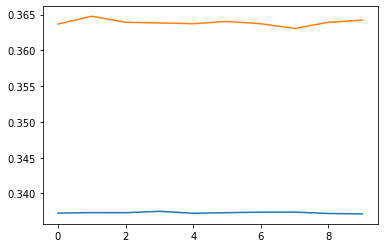

In [107]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

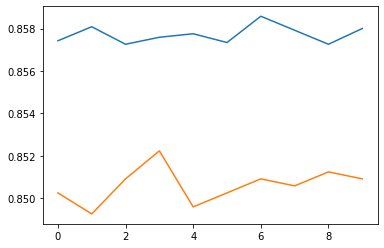

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [110]:
y_pred = model.predict(x_test)

In [116]:
from sklearn.metrics import classification_report
predictions = (model.predict(x_test) > 0.5).astype('int32')

In [117]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2486
           1       0.84      0.73      0.78      1295

    accuracy                           0.86      3781
   macro avg       0.85      0.83      0.84      3781
weighted avg       0.86      0.86      0.86      3781

